In [50]:
import numpy as np
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt

In [63]:
# Load the trained model
neural_network_model = load_model(r"F:\Cancer Pred\your_model.h5")

In [52]:
# Define the class labels
class_labels = ["EarlyPreB", "PreB", "ProB", "Benign" ]


In [53]:
# Define the desired input shape for the model
desired_input_shape = (224, 224)

In [54]:
# Function to preprocess input data
def preprocess_input_data(input_data):
    # Resize input image to the desired shape
    resized_image = cv2.resize(input_data, (desired_input_shape[0], desired_input_shape[1]))
    # Normalize image
    normalized_image = resized_image / 255.0
    # Expand dimensions to match model's input shape
    preprocessed_input_data = np.expand_dims(normalized_image, axis=0)
    return preprocessed_input_data

In [240]:
# Path to the new input image
new_input_image_path = r"F:\Cancer Pred\Dmiher_samples\Ep.jpg"

# Read the new input image
new_input_image = cv2.imread(new_input_image_path)


In [241]:
# Check if the input image is valid
if new_input_image is None:
    print("Error: Failed to read the input image.")
else:
    # Preprocess the input data
    preprocessed_input_data = preprocess_input_data(new_input_image)


In [242]:
# Make predictions using the loaded model
predictions = neural_network_model.predict(preprocessed_input_data)

1/1 [==============================] - 0s 48ms/step


In [243]:
for i in range(len(class_labels)):
    print(f"Predicted Probability for Class '{class_labels[i]}': {predictions[0][i]}")

Predicted Probability for Class 'EarlyPreB': 0.0008173955138772726
Predicted Probability for Class 'PreB': 0.002187706995755434
Predicted Probability for Class 'ProB': 0.9969942569732666
Predicted Probability for Class 'Benign': 7.037156706246606e-07


In [244]:
# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)
# Determine the predicted class label
predicted_class = class_labels[predicted_class_index]
# Print the predicted cancer type
print(f"Predicted Cancer Type: {predicted_class}")


Predicted Cancer Type: ProB


In [245]:
predicted_class_index = np.argmax(predictions)

In [246]:
predicted_class = class_labels[predicted_class_index]

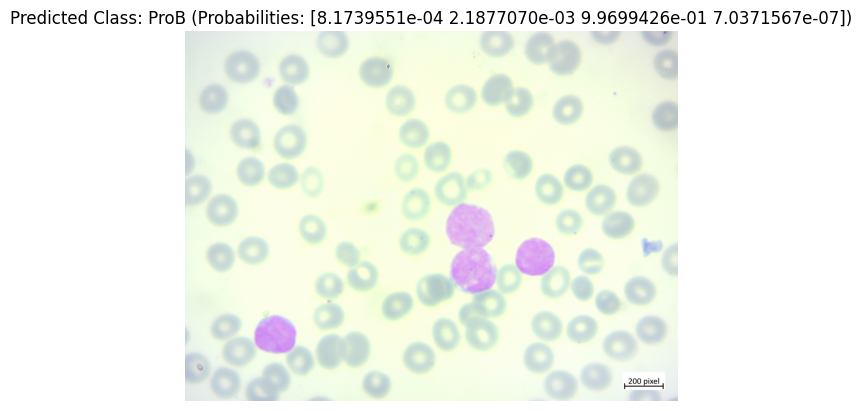

In [247]:
plt.imshow(cv2.cvtColor(new_input_image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class} (Probabilities: {predictions[0]})")
plt.axis('off')
plt.show()